In [12]:
info={
    20170136837:{
        'nombres':'Jorge Juan',
        'apellidos':'Moreno, Lopez',
        'documento':88481595,
        'programa':'ARQU',
        'materias':[
            {
                'facultad':'Arquitectura',
                'codigo':'ARQU-2113',
                'nota':2.97,
                'creditos':2,
                'retirada':'No'
            },
            {
                'facultad':'Arquitectura',
                'codigo':'ARQU-5048',
                'nota':4.26,
                'creditos':0,
                'retirada':'No'
            }
        ]
        
    },
    20130225137:{
        'nombres':'Sara Carolina',
        'apellidos':'Gómez, Fernández',
        'documento':58770043,
        'programa':'ARQD',
        'materias':[
            {
                'facultad':'Arquitectura',
                'codigo':'ARQU-7738',
                'nota':3.36,
                'creditos':3,
                'retirada':'No'
            },
            {
                'facultad':'Arquitectura',
                'codigo':'ARQU-7698',
                'nota':1.59,
                'creditos':4,
                'retirada':'Si'
            }
        ]
        
    }
    
}

# print(info)
# for a in info:
#     print(a)
#     participante={}
#     participante=info[a]
#     participante.setdefault('promedio',0)
#     participante.setdefault('correo','')
#     participante.setdefault('codigo',a)
#     materias=participante.pop('materias')
# print(participante)
# print()
# print(materias)
# mayorPromedio=0
# sumatoria=0
# cantidad=0
# ganador={}
# for m in materias:
#     if m['retirada']=='No':
#         sumatoria+=m['nota']*m['creditos']
#         cantidad+=m['creditos']
# if cantidad>0 and sumatoria>0:
#     participante['promedio']=sumatoria/cantidad

# #Condicion que me permite evaluar los promedios de los estudiantes que estan participante en el concurso
# if participante['promedio']>mayorPromedio:
#     ganador=participante
#     mayorPromedio=participante['promedio']
# #Si el  promedio de varios estudiantes con el promedio mayor son iguales, se debe desempatar a partir del 
# #año de ingreso y sino a partir del periodo de ingreso a la universidad
# elif participante['promedio']==mayorPromedio:
#     anioGanador=int(str(ganador['codigo'])[0:4])
#     anioParti=int(str(participante['codigo'])[0:4])
#     periodoGanador=int(str(ganador['codigo'])[4:6])
#     periodoPart=int(str(participante['codigo'])[4:6])

#     #La condicion para desempatar a partir del año de ingreso de los estudiantes
#     if anioPart<anioGanador:
#         ganador=participante
#         mayorPromedio=participante['promedio']
#     elif anioParti==anioGanador:
#         if periodoPart<periodoGanador:
#             ganador=participante
#             mayorPromedio=participante['promedio']

# print(sumatoria)
# print(cantidad)
# print(participante)
# print()
def Seleccion(info: dict) -> list:
    ganador={}
  
    mayorPromedio=0
    for a in info:
        
        participante={}#{'nombre':'', 'apellido':'', 'documento':0, 'programa':'','promedio':0,'correo':''}
        participante=info[a]
        participante.setdefault('promedio',0)
        participante.setdefault('correo','')
        participante.setdefault('codigo',a)
        materias= participante.pop('materias')
        sumatoria=0
        cantidad=0
        #EValuando si el estudiante retiro la materia o no la retiro
        for m in materias:
            if m['retirada']=='No':
                sumatoria+=m['nota']*m['creditos']
                cantidad+=m['creditos']
        if cantidad >0 and sumatoria>0:
            participante['promedio']=sumatoria/cantidad
        #Vamos a evaluar el promedio de los estudiantes y vamos a obtener el promedio mayor. El estudiante
        #con el promedio mayor, su informacion va a estar almacenado en el diccionario ganador
        if participante['promedio']>mayorPromedio:
            ganador=participante
            mayorPromedio=participante['promedio']
        #Si el promedio de dos estudiantes son iguales, entonces el desempate se hace por el año de ingreso
        #del estudiante a la universidad, y si el año son iguales, el desempate se realiza a partir del periodo
        #de ingreso a la universidad
        elif participante['promedio']==mayorPromedio: #and not(participante['promedio']==0):
            añoGanador=int(str(ganador['codigo'])[0:4])
            añoParti=int(str(participante['codigo'])[0:4])
            periodoGanador=int(str(ganador['codigo'])[4:6])
            periodoParti=int(str(participante['codigo'])[4:6])
            
            if añoParti< añoGanador:
                ganador=participante
                mayorPromedio=participante['promedio']   
            elif añoParti== añoGanador:
                if periodoParti< periodoGanador:
                    ganador=participante
                    mayorPromedio=participante['promedio']     
    
    corteNombre=ganador['nombres'].find(' ')
    corteApellido=ganador['apellidos'].find(',')
    #construimos el correo del estudiante
    if not(ganador['nombres'].find(' ')==-1):        
        c=ganador['nombres'][:1]+ganador['nombres'][corteNombre+1:corteNombre+2]+"."+ganador['apellidos'][:corteApellido]+str(ganador['documento'])[-2:]  
    else:
        c= ganador['nombres'][:1] + ganador['apellidos'][:1]+"."+ganador['apellidos'][corteApellido+2:]+str(ganador['documento'])[-2:]  
    c=c.lower() #Conviertiendo en minuscula el correo del estudiante
    for u in range(0,len(c)):
       y=c[u:u+1]
       if y =='á':
            c=c[0:u]+'a'+c[u+1:]
       elif y =='é':
            c=c[0:u]+'e'+c[u+1:]   
       elif y =='ì':
            c=c[0:u]+'i'+c[u+1:]
       elif y =='ó':
            c=c[0:u]+'o'+c[u+1:]
       elif y =='ù':
            c=c[0:u]+'u'+c[u+1:]  
    ganador['correo']=c
    return [ganador['codigo'],ganador['nombres'],ganador['apellidos'],ganador['documento'],ganador['programa'],ganador['promedio'],ganador['correo']]
    #Vamos a verificar el correo del estudiante ganador

# #Aqui solamente encontre la posicion del espacio tanto en el nombre como en el apellido del diccionario ganador
# corteNombre=ganador['nombres'].find(' ')
# corteApellido=ganador['apellidos'].find(',')
# print(corteNombre)
# print(corteApellido)

# #Condicion para crear el correo del estudiante
# #Cuando igualamos a -1 quiere decir que no se encontro algo, en este que el ganador no se encuntra
# if not(ganador['nombres'].find(' ')==-1):
#     #Variable c es donde voy a almacenar el correo
#     c=ganador['nombres'][:1]+ganador['nombres'][corteNombre+1:corteNombre+2]+'.'+ganador['apellidos'][:corteApellido]+str(ganador['documento'])[-2:]
# else:
#     c=ganador['nombres'][:1]+ganador['apellidos'][:1]+'.'+ganador['apellidos'][corteApellido+2:]+str(ganador['documento'])[-2:]

# print(c)
# c=c.lower() #Lower permite convertir el correo en minuscula
# print(c)
# ganador=Seleccion(info)
# ganador

# print(ganador)

Seleccion(info)

[20130225137,
 'Sara Carolina',
 'Gómez, Fernández',
 58770043,
 'ARQD',
 3.36,
 'sc.gomez43']

In [9]:
# Seleccion(info)

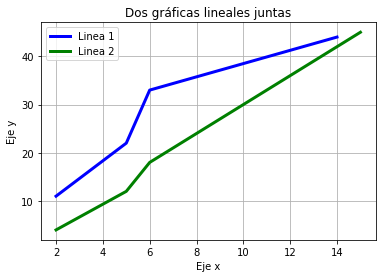

In [20]:
import matplotlib.pyplot as plt
x1=[2,5,6,14]
y1=[11,22,33,44]

x2=[2,5,6,15]
y2=[4,12,18,45]

#Graficar 2 lineas en la misma grid  (crear una cuadricula en la grafica o rejilla)
plt.plot(x1,y1,color='blue',linewidth=3,label='Linea 1')
plt.plot(x2,y2,color='green',linewidth=3,label='Linea 2')
plt.title("Dos gráficas lineales juntas")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
#Mostrar las etiquetas o label de las graficas lineales
plt.legend()
#Mostrar la cuadricula o la rejilla del grafico
plt.grid()
plt.show()

# Graficas de barras

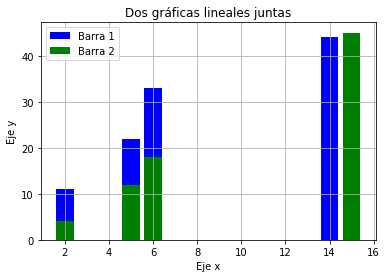

In [21]:
#Graficas de barras en la misma grid  (crear una cuadricula en la grafica o rejilla)
plt.bar(x1,y1,color='blue',linewidth=3,label='Barra 1')
plt.bar(x2,y2,color='green',linewidth=3,label='Barra 2')
plt.title("Dos gráficas lineales juntas")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
#Mostrar las etiquetas o label de las graficas lineales
plt.legend()
#Mostrar la cuadricula o la rejilla del grafico
plt.grid()
plt.show()

# Generar un histograma

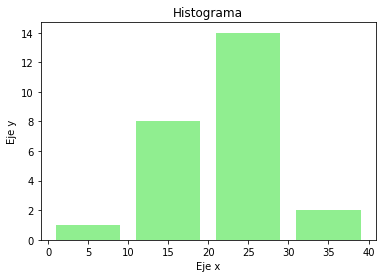

In [30]:
Datos=[20,22,21,20,23,25,28,40,22,23,22,15,16,18,18,19,21,22,24,4,12,17,17,22,30]
Rangobin=[0,10,20,30,40]

# rwidth permite asignar una separacion entre cada barra en pixeles
plt.hist(Datos, Rangobin, histtype='bar',rwidth=0.8,color='lightgreen')
plt.title('Histograma')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
#plt.grid() #La rejilla es opcional (o cuadricula)
plt.show()

# Grafico circular o un grafico de pastel

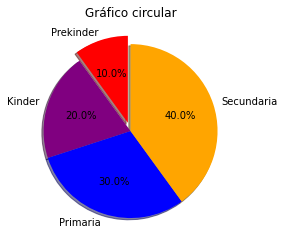

In [42]:
valores=[20,40,60,80]
label=['Prekinder','Kinder','Primaria','Secundaria']
color=['red','purple','blue','orange']
plt.pie(valores,labels=label,colors=color,startangle=90,shadow=True,explode=(0.1,0,0,0),autopct='%1.1f%%')
plt.title('Gráfico circular')
plt.show()

# Graficas a partir de un dataframe

In [70]:
import pandas as pd
df=pd.DataFrame({
    'Nombre':['John','Maria','Pedro','Jenifer','Bob','Lisa','Jose'],
    'Edad':[23,78,22,19,45,33,78],
    'Ciudad':['Bogota','Medellin','Bogota','Medellin','Bogota','Armenia','Armenia'],
    'Num_niños':[2,0,0,3,2,1,5],
    'Num_mascotas':[5,1,0,5,2,2,5]
})

df

,Nombre,Edad,Ciudad,Num_niños,Num_mascotas
0,John,23,Bogota,2,5
1,Maria,78,Medellin,0,1
2,Pedro,22,Bogota,0,0
3,Jenifer,19,Medellin,3,5
4,Bob,45,Bogota,2,2
5,Lisa,33,Armenia,1,2
6,Jose,78,Armenia,5,5


<AxesSubplot:>

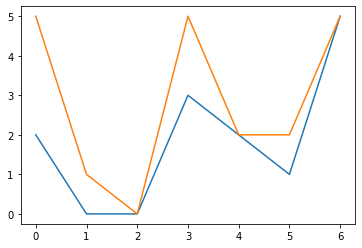

In [71]:
df['Num_niños'].plot(kind='line')
df['Num_mascotas'].plot(kind='line')

<AxesSubplot:xlabel='Num_niños', ylabel='Num_mascotas'>

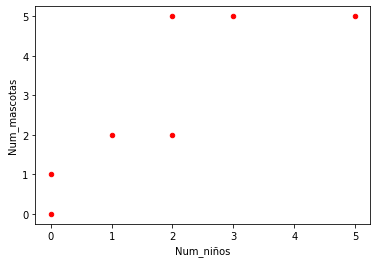

In [72]:
df.plot(kind='scatter',x='Num_niños',y='Num_mascotas',color='red')

<AxesSubplot:>

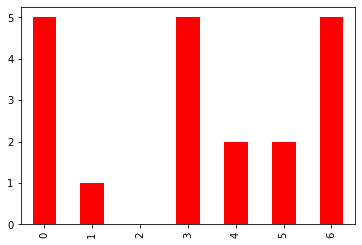

In [73]:
df['Num_niños'].plot(kind='bar')
df['Num_mascotas'].plot(kind='bar',color='red')

<AxesSubplot:xlabel='Nombre'>

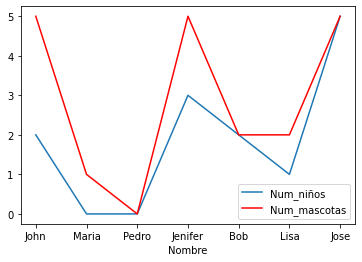

In [74]:
#Metodo gca ṕermite obtener los ejes actuales de la grafica en el eje x y el eje y
ax=plt.gca()
df.plot(kind='line',x='Nombre',y='Num_niños',ax=ax)
df.plot(kind='line',x='Nombre',y='Num_mascotas',color='red',ax=ax)

# Agrupacion de series groupby

In [75]:
print(df)
df.groupby('Ciudad').nunique()

    Nombre  Edad    Ciudad  Num_niños  Num_mascotas
0     John    23    Bogota          2             5
1    Maria    78  Medellin          0             1
2    Pedro    22    Bogota          0             0
3  Jenifer    19  Medellin          3             5
4      Bob    45    Bogota          2             2
5     Lisa    33   Armenia          1             2
6     Jose    78   Armenia          5             5


,Nombre,Edad,Num_niños,Num_mascotas
Ciudad,,,,
Armenia,2,2,2,2
Bogota,3,3,2,3
Medellin,2,2,2,2


In [76]:
df.groupby('Ciudad')['Nombre'].nunique()

Ciudad
Armenia     2
Bogota      3
Medellin    2
Name: Nombre, dtype: int64

<AxesSubplot:xlabel='Ciudad'>

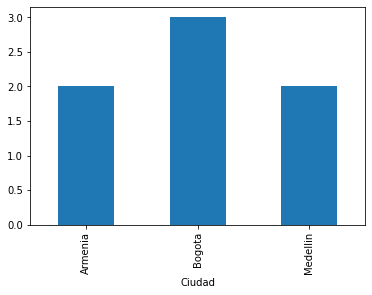

In [77]:
df.groupby('Ciudad')['Nombre'].nunique().plot(kind='bar')

<AxesSubplot:xlabel='Ciudad,Edad'>

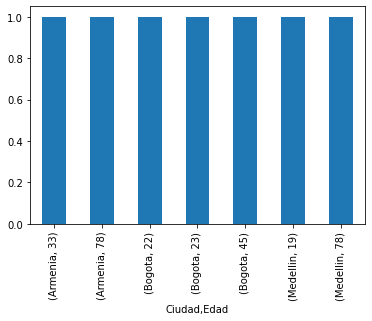

In [78]:
df.groupby(['Ciudad','Edad']).size().plot(kind='bar')

<AxesSubplot:xlabel='Ciudad'>

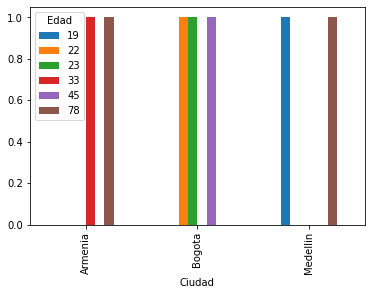

In [79]:
df.groupby(['Ciudad','Edad']).size().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Ciudad'>

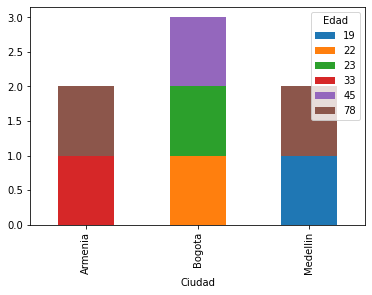

In [80]:
df.groupby(['Ciudad','Edad']).size().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:ylabel='Frequency'>

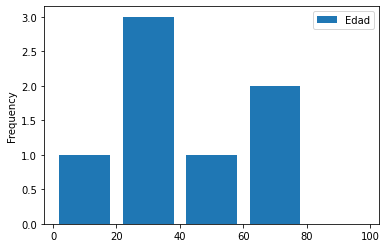

In [83]:
# bins=[0,20,40,60,80,100] el rango de valores que esta realizando la agrupacion
df[['Edad']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)

# Dataframe con campo de tipo fecha

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame({
    'name':[
        'john','lisa','peter','carl','linda','betty'
    ],
    'date_of_birth':['01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970']
})

df

,name,date_of_birth
0,john,01/21/1988
1,lisa,03/10/1977
2,peter,07/25/1999
3,carl,01/22/1977
4,linda,09/30/1968
5,betty,09/15/1970


In [92]:
#HAce la transformacion a un tipo de fecha que pueda ser leido por la funcion map
df['date_of_birth']=pd.to_datetime(df['date_of_birth'],infer_datetime_format=True)
df

,name,date_of_birth
0,john,1988-01-21
1,lisa,1977-03-10
2,peter,1999-07-25
3,carl,1977-01-22
4,linda,1968-09-30
5,betty,1970-09-15


In [91]:
df['date_of_birth'].map(lambda d:d.month)

0    1
1    3
2    7
3    1
4    9
5    9
Name: date_of_birth, dtype: int64

<AxesSubplot:ylabel='Frequency'>

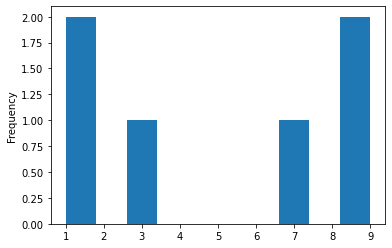

In [88]:
df['date_of_birth'].map(lambda d:d.month).plot(kind='hist')

In [85]:
x=lambda a:a+10
print(x(5))

15


In [90]:
x=lambda a:a
print(x(5))

5


[datetime.datetime(2011, 1, 4, 0, 0), datetime.datetime(2011, 1, 5, 0, 0), datetime.datetime(2011, 1, 6, 0, 0)]

[14978. 14979. 14980.]
AxesSubplot(0.125,0.125;0.775x0.755)


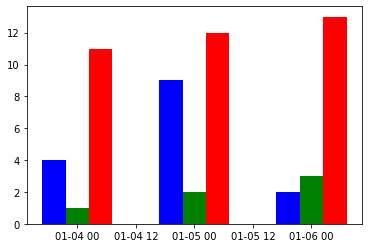

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x=[
    datetime.datetime(2011,1,4,0,0),
    datetime.datetime(2011,1,5,0,0),
    datetime.datetime(2011,1,6,0,0)
]

print(x)

x=date2num(x) #Verificar funcion date2num
print()
print(x)
y=[4,9,2]
z=[1,2,3]
k=[11,12,13]
ax=plt.subplot(111)
print(ax)
ax.bar(x-0.2,y,width=0.2,color='b',align='center')
ax.bar(x,z,width=0.2,color='g',align='center')
ax.bar(x+0.2,k,width=0.2,color='r',align='center')
ax.xaxis_date()
plt.show()

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
#importar datos para crear dataframe
liquido_url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
liquido_column_headers=['Alcohol','Acido Malico','Cenizas','Alcalinidad de las cenizas',
                        'Magnesio','Fenoles totales,Flavanoides','Fenoles no flavonoides','Proantocianinas',
                       'Intensidad de color','Matiz','0D280/0D315 de sustancia diluida','Prolina']
liquido_df=pd.read_csv(liquido_url,names=liquido_column_headers)
liquido_df.describe()

,Alcohol,Acido Malico,Cenizas,Alcalinidad de las cenizas,Magnesio,"Fenoles totales,Flavanoides",Fenoles no flavonoides,Proantocianinas,Intensidad de color,Matiz,0D280/0D315 de sustancia diluida,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [100]:
liquido_df.head(3)

Alcohol  Acido Malico  Cenizas  Alcalinidad de las cenizas  Magnesio  \
1 14.23     1.71          2.43     15.6                         127      2.80   
  13.20     1.78          2.14     11.2                         100      2.65   
  13.16     2.36          2.67     18.6                         101      2.80   

         Fenoles totales,Flavanoides  Fenoles no flavonoides  Proantocianinas  \
1 14.23                         3.06                    0.28             2.29   
  13.20                         2.76                    0.26             1.28   
  13.16                         3.24                    0.30             2.81   

         Intensidad de color  Matiz  0D280/0D315 de sustancia diluida  Prolina  
1 14.23                 5.64   1.04                              3.92     1065  
  13.20                 4.38   1.05                              3.40     1050  
  13.16                 5.68   1.03                              3.17     1185

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)
1  14.23     5.64
   13.20     4.38
   13.16     5.68
   14.37     7.80
   13.24     4.32
            ...  
3  13.71     7.70
   13.40     7.30
   13.27    10.20
   13.17     9.30
   14.13     9.20
Name: Intensidad de color, Length: 178, dtype: float64


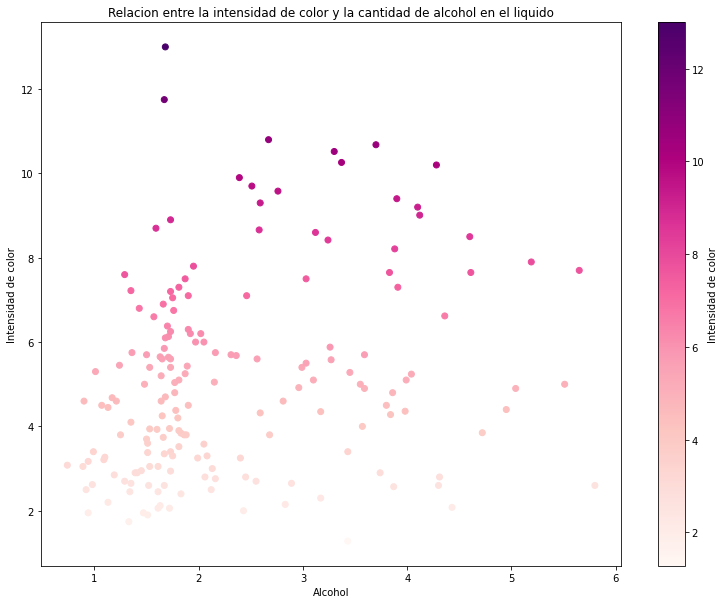

In [114]:
# Figura
fig, ax1=plt.subplots()
print(fig)
print(ax1)

#Etiquetas a la grafica
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Intensidad de color')
ax1.set_title('Relacion entre la intensidad de color y la cantidad de alcohol en el liquido')
#Vamos a cambiar el tamaño de la figura 
fig.set_size_inches(13,10)

#secuencia de color
c=liquido_df['Intensidad de color']
print(c)

plt.scatter(liquido_df['Alcohol'],liquido_df['Intensidad de color'],c=c,cmap='RdPu')

cbar=plt.colorbar()
cbar.set_label('Intensidad de color')

In [116]:
info={
    20170136837:{
        'nombres':'Jorge Juan',
        'apellidos':'Moreno, Lopez',
        'documento':88481595,
        'programa':'ARQU',
        'materias':[
            {
                'facultad':'Arquitectura',
                'codigo':'ARQU-2113',
                'nota':2.97,
                'creditos':2,
                'retirada':'No'
            },
            {
                'facultad':'Arquitectura',
                'codigo':'ARQU-5048',
                'nota':4.26,
                'creditos':0,
                'retirada':'No'
            }
        ]
        
    },
    20130225137:{
        'nombres':'Sara Carolina',
        'apellidos':'Gómez, Fernández',
        'documento':58770043,
        'programa':'ARQD',
        'materias':[
            {
                'facultad':'Arquitectura',
                'codigo':'ARQU-7738',
                'nota':3.36,
                'creditos':3,
                'retirada':'No'
            },
            {
                'facultad':'Arquitectura',
                'codigo':'ARQU-7698',
                'nota':1.59,
                'creditos':4,
                'retirada':'Si'
            }
        ]
        
    }
    
}

def Seleccion(info: dict) -> list:
    ganador={}
  
    mayorPromedio=0
    for a in info:
        
        participante={}#{'nombre':'', 'apellido':'', 'documento':0, 'programa':'','promedio':0,'correo':''}
        participante=info[a]
        participante.setdefault('promedio',0)
        participante.setdefault('correo','')
        participante.setdefault('codigo',a)
        materias= participante.pop('materias')
        sumatoria=0
        cantidad=0
        #EValuando si el estudiante retiro la materia o no la retiro
        for m in materias:
            if m['retirada']=='No':
                sumatoria+=m['nota']*m['creditos']
                cantidad+=m['creditos']
        if cantidad >0 and sumatoria>0:
            participante['promedio']=sumatoria/cantidad
        #Vamos a evaluar el promedio de los estudiantes y vamos a obtener el promedio mayor. El estudiante
        #con el promedio mayor, su informacion va a estar almacenado en el diccionario ganador
        if participante['promedio']>mayorPromedio:
            ganador=participante
            mayorPromedio=participante['promedio']
        #Si el promedio de dos estudiantes son iguales, entonces el desempate se hace por el año de ingreso
        #del estudiante a la universidad, y si el año son iguales, el desempate se realiza a partir del periodo
        #de ingreso a la universidad
        elif participante['promedio']==mayorPromedio: #and not(participante['promedio']==0):
            añoGanador=int(str(ganador['codigo'])[0:4])
            añoParti=int(str(participante['codigo'])[0:4])
            periodoGanador=int(str(ganador['codigo'])[4:6])
            periodoParti=int(str(participante['codigo'])[4:6])
            
            if añoParti< añoGanador:
                ganador=participante
                mayorPromedio=participante['promedio']   
            elif añoParti== añoGanador:
                if periodoParti< periodoGanador:
                    ganador=participante
                    mayorPromedio=participante['promedio']     
    
    corteNombre=ganador['nombres'].find(' ')
    corteApellido=ganador['apellidos'].find(',')
    #construimos el correo del estudiante
    if not(ganador['nombres'].find(' ')==-1):        
        c=ganador['nombres'][:1]+ganador['nombres'][corteNombre+1:corteNombre+2]+"."+ganador['apellidos'][:corteApellido]+str(ganador['documento'])[-2:]  
    else:
        c= ganador['nombres'][:1] + ganador['apellidos'][:1]+"."+ganador['apellidos'][corteApellido+2:]+str(ganador['documento'])[-2:]  
    c=c.lower() #Conviertiendo en minuscula el correo del estudiante
    for u in range(0,len(c)):
       y=c[u:u+1]
       if y =='á':
            c=c[0:u]+'a'+c[u+1:]
       elif y =='é':
            c=c[0:u]+'e'+c[u+1:]   
       elif y =='ì':
            c=c[0:u]+'i'+c[u+1:]
       elif y =='ó':
            c=c[0:u]+'o'+c[u+1:]
       elif y =='ù':
            c=c[0:u]+'u'+c[u+1:]  
    ganador['correo']=c
    return [ganador['codigo'],ganador['nombres'],ganador['apellidos'],ganador['documento'],ganador['programa'],ganador['promedio'],ganador['correo']]
Seleccion(info)

[20130225137,
 'Sara Carolina',
 'Gómez, Fernández',
 58770043,
 'ARQD',
 3.36,
 'sc.gomez43']